# THE SPARK FOUNDATION


## TAKS 1- Prediction using Supervised ML
####  To predict the percentage of marks of the students based on the number hours they studied.

## Author - Navodhaya A A

In [3]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [5]:
#Reading the data
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
#check datatypes
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.shape

(25, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [12]:
#check if there is any null value in the dataset
df.isnull().any()

Hours     False
Scores    False
dtype: bool

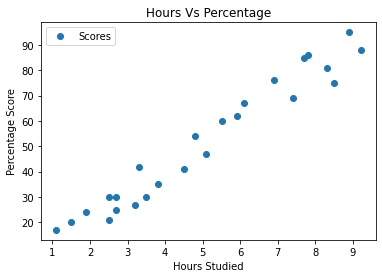

In [13]:
#there is no null value so, we can visualise the data
df.plot(x = 'Hours', y = 'Scores',style = 'o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

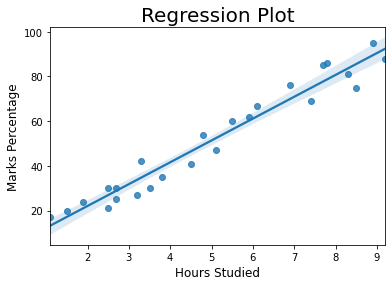

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x = df['Hours'], y = df['Scores'])
plt.title('Regression Plot', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()
print(df.corr())

In [15]:
#Defining x and y from the data
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print('training is completed')


training is completed


# Plotting regression line with data point

In [17]:
print("model intercept : ", lr.intercept_)
print("model coefficient:", lr.coef_)

model intercept :  1.932204253151646
model coefficient: [9.94167834]


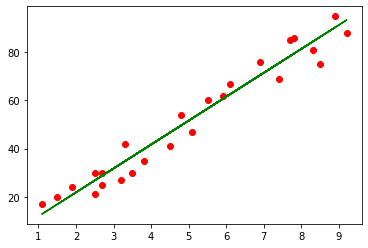

In [18]:
m = lr.coef_
c = lr.intercept_
line = m*x+c
plt.scatter(x, y, c ='r')
plt.plot(x, line, c='g')
plt.show()

In [19]:
pred=lr.predict(x_test)

In [20]:
prediction = pd.DataFrame({'Original': y_test, 'Predicted': pred})
prediction

,Original,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# What would be the predicted score if a students studies for 9.25 hours/day?

In [21]:
h = 9.25
s = lr.predict([[h]])
print("No.of Hours = {}".format(h))
print("Predicted Score = {}".format(s[0]))
                

No.of Hours = 9.25
Predicted Score = 93.89272889341655


# Model Evaluation

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('r2 value is given by:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 4.130879918502486
r2 value is given by: 0.9367661043365055
